In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

from matplotlib.sankey import Sankey
import plotly.graph_objects as go


In [110]:
current_dir = os.getcwd()
datapath = os.path.join(current_dir, "../..", 'data/outputs/DES_data.csv')

df = pd.read_csv(datapath, sep=',', index_col='date')
df.index = pd.to_datetime(df.index)
print(df.head())

                     PVSim-0.PV_0-P[MW]  CSV-0.DNI_0-DNI  \
date                                                       
2022-01-01 00:00:00                 0.0           -0.991   
2022-01-01 00:15:00                 0.0           -1.000   
2022-01-01 00:30:00                 0.0           -0.996   
2022-01-01 00:45:00                 0.0           -0.989   
2022-01-01 01:00:00                 0.0           -0.976   

                     CSV-1.HEATLOAD_0-T_amb  HeatPumpSim-0.HeatPump_0-T_amb  \
date                                                                          
2022-01-01 00:00:00                   6.855                           0.000   
2022-01-01 00:15:00                   6.460                           6.855   
2022-01-01 00:30:00                   6.205                           6.460   
2022-01-01 00:45:00                   6.100                           6.205   
2022-01-01 01:00:00                   6.100                           6.100   

                     CSV-

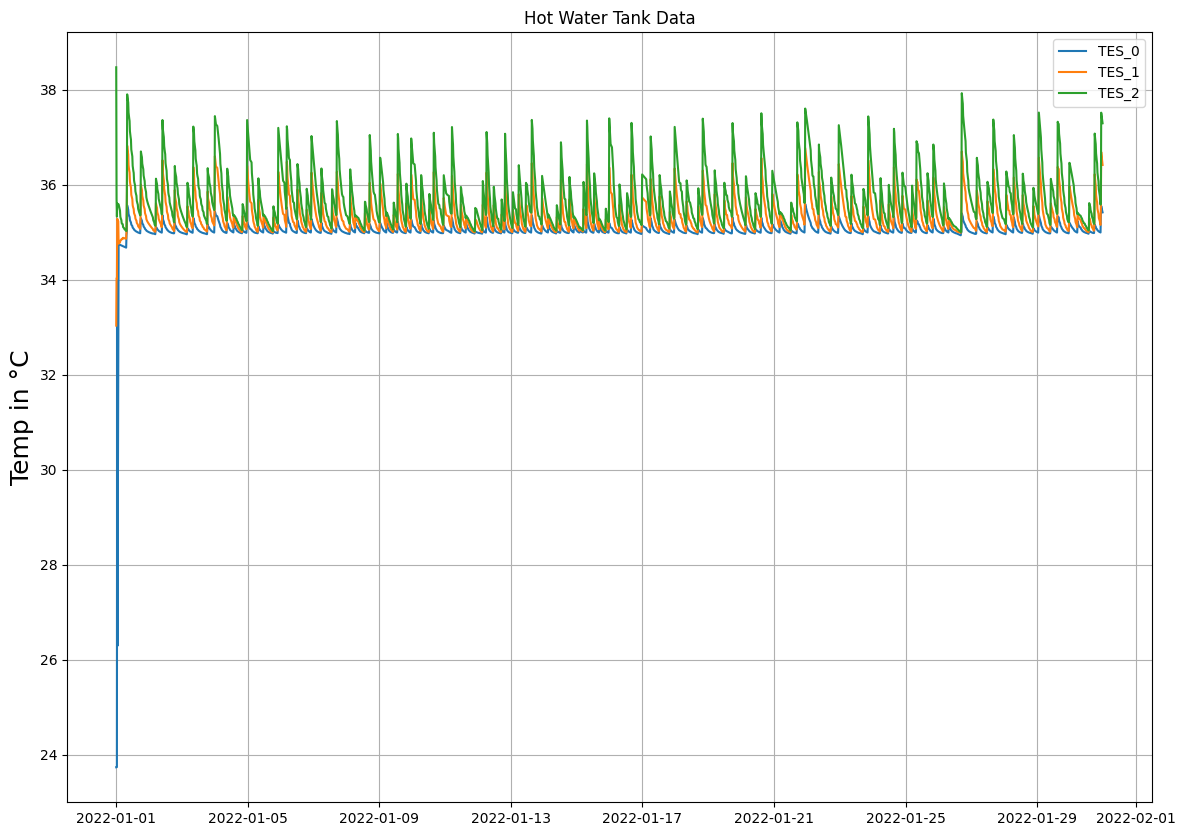

In [111]:
hot_water_tank_columns = [col for col in df.columns if col.startswith('HotWaterTankSim-0.HotWaterTank_0-sensor')] # hwts1


plt.figure(figsize=(14, 10))
plt.plot(df[hot_water_tank_columns], label=['TES_0', 'TES_1', 'TES_2'])
# plt.plot(df['HotWaterTankSim-0.HotWaterTank_0-hp_out.T'], color='orange')
# 
# plt.plot(df['CHPSim-0.CHP_0-temp_out'], color='red', label='CHP out temp')
# plt.plot(df['HotWaterTankSim-0.HotWaterTank_0-hp_in.T'], color='blue', label='HP output')
# plt.plot(df['HeatPumpSim-0.HeatPump_0-heat_source_T'], color='red', label='heat source temp')
# plt.plot(df['ControllerSim-0.Controller_0-dhw_in_T'], color='red', label='DHW in T')
plt.ylabel('Temp in °C', fontsize=18)
plt.title('Hot Water Tank Data')
plt.grid()
plt.legend()
plt.show()

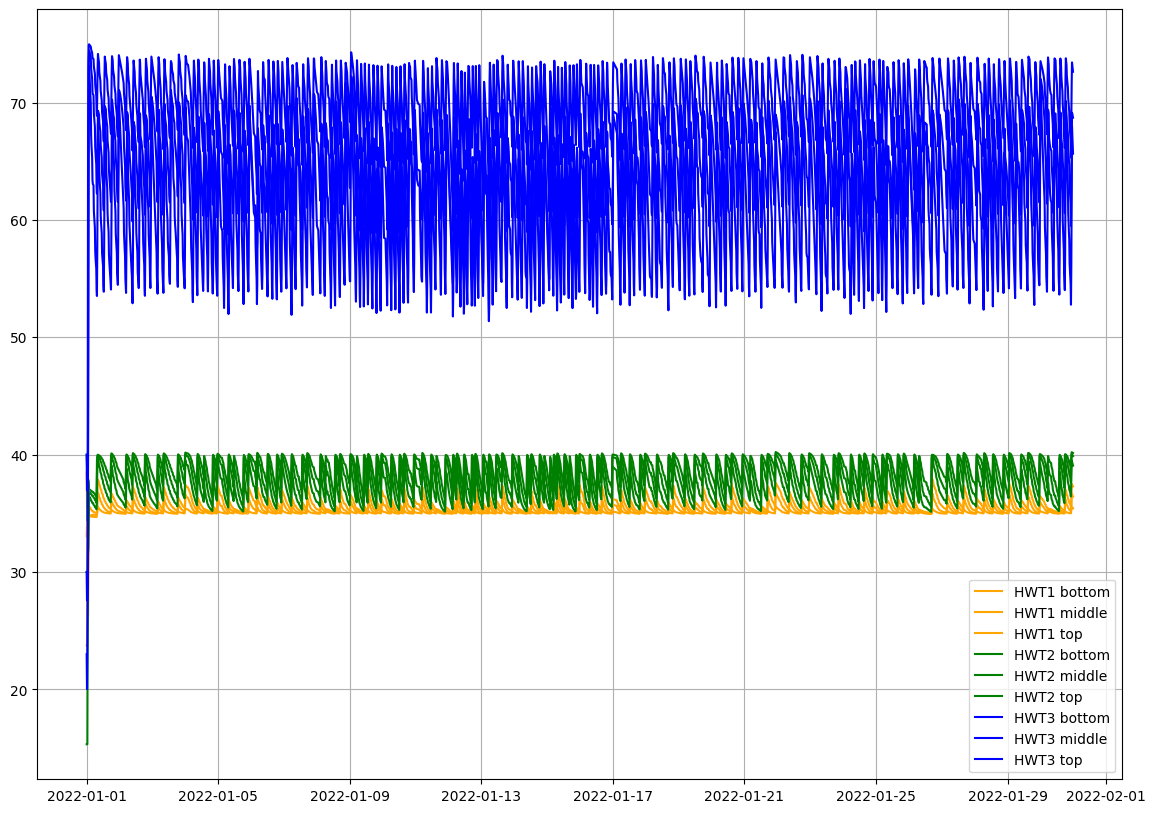

In [112]:
hwt1_cols = [col for col in df.columns if col.startswith('HotWaterTankSim-0.HotWaterTank_0-sensor')]
hwt2_cols = [col for col in df.columns if col.startswith('HotWaterTankSim-1.HotWaterTank_0-sensor')]
hwt3_cols = [col for col in df.columns if col.startswith('HotWaterTankSim-2.HotWaterTank_0-sensor')]

plt.figure(figsize=(14, 10))
plt.plot(df[hwt1_cols], label=['HWT1 bottom', 'HWT1 middle', 'HWT1 top'], color = 'orange')
plt.plot(df[hwt2_cols], label=['HWT2 bottom', 'HWT2 middle', 'HWT2 top'], color = 'green')
plt.plot(df[hwt3_cols], label=['HWT3 bottom', 'HWT3 middle', 'HWT3 top'], color = 'blue')

plt.grid()
plt.legend()
plt.show()

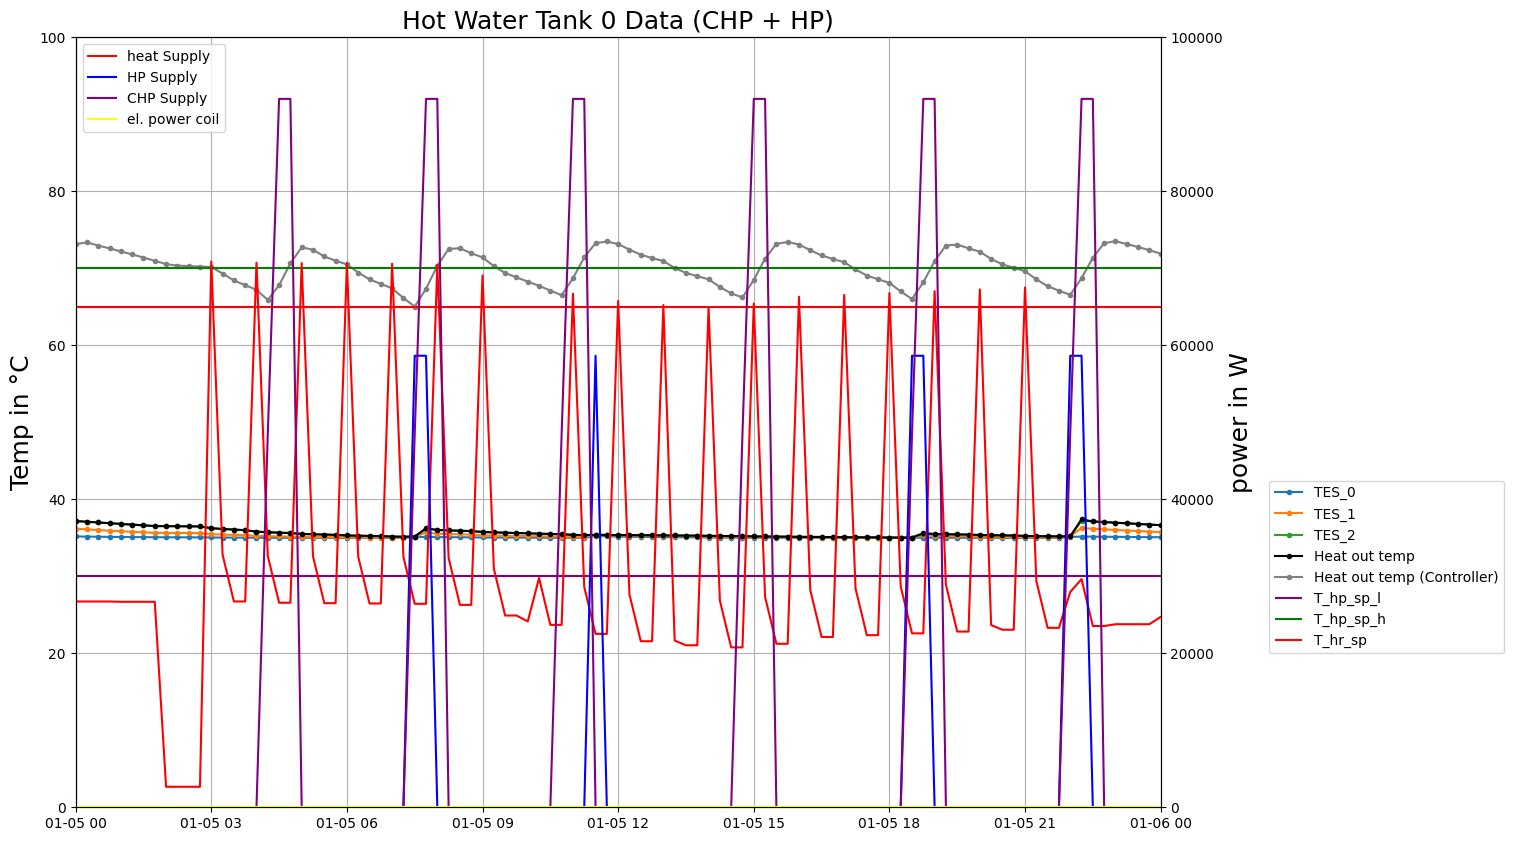

In [113]:
params_ctrl = {
    'T_hp_sp_h': 70,
    'T_hp_sp_l': 30,
    'T_hr_sp': 65,
    'operation_mode': 'heating',
    'control_strategy': '3'
}

hot_water_tank_columns = [col for col in df.columns if col.startswith('HotWaterTankSim-0.HotWaterTank_0-sensor')]

plt.figure(figsize=(14, 10))

# Plotting the hot water tank data
plt.plot(df[hot_water_tank_columns], label=['TES_0', 'TES_1', 'TES_2'], marker='.')
plt.plot(df['HotWaterTankSim-0.HotWaterTank_0-heat_out.T'], color='black', label='Heat out temp', marker='.')
plt.plot(df['ControllerSim-0.Controller_0-heat_out_T'], color='grey', label='Heat out temp (Controller)', marker='.')

# Plotting horizontal lines
plt.hlines(params_ctrl['T_hp_sp_l'], 1000, 9999999, label='T_hp_sp_l', color='purple')
plt.hlines(params_ctrl['T_hp_sp_h'], 1000, 9999999, label='T_hp_sp_h', color='green')
plt.hlines(params_ctrl['T_hr_sp'], 1000, 9999999, label='T_hr_sp', color='red')


# Primary y-axis
plt.ylabel('Temp in °C', fontsize=18)
plt.title('Hot Water Tank 0 Data (CHP + HP)', fontsize=18)
plt.grid()
plt.xlim([datetime.date(2022, 1, 5), datetime.date(2022, 1, 6)])
plt.ylim(0,100)
plt.legend(loc=(1.1, 0.2))

# Create secondary y-axis for sh_demand
ax2 = plt.gca().twinx()
ax2.plot(df.index, df['ControllerSim-0.Controller_0-heat_demand'], color='red', label='heat Supply')
ax2.plot(df.index, df['ControllerSim-0.Controller_0-hp_supply'], color='blue', label='HP Supply')
ax2.plot(df.index, df['ControllerSim-0.Controller_0-chp_supply'], color='purple', label='CHP Supply')
ax2.plot(df.index, df['ControllerSim-0.Controller_0-P_hr'], color='yellow', label='el. power coil')
ax2.set_ylabel('power in W', fontsize=18)
ax2.tick_params(axis='y')
ax2.set_ylim(0,100_000)

# Combining legends from both axes
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(labels + labels2, loc='upper left')

plt.show()

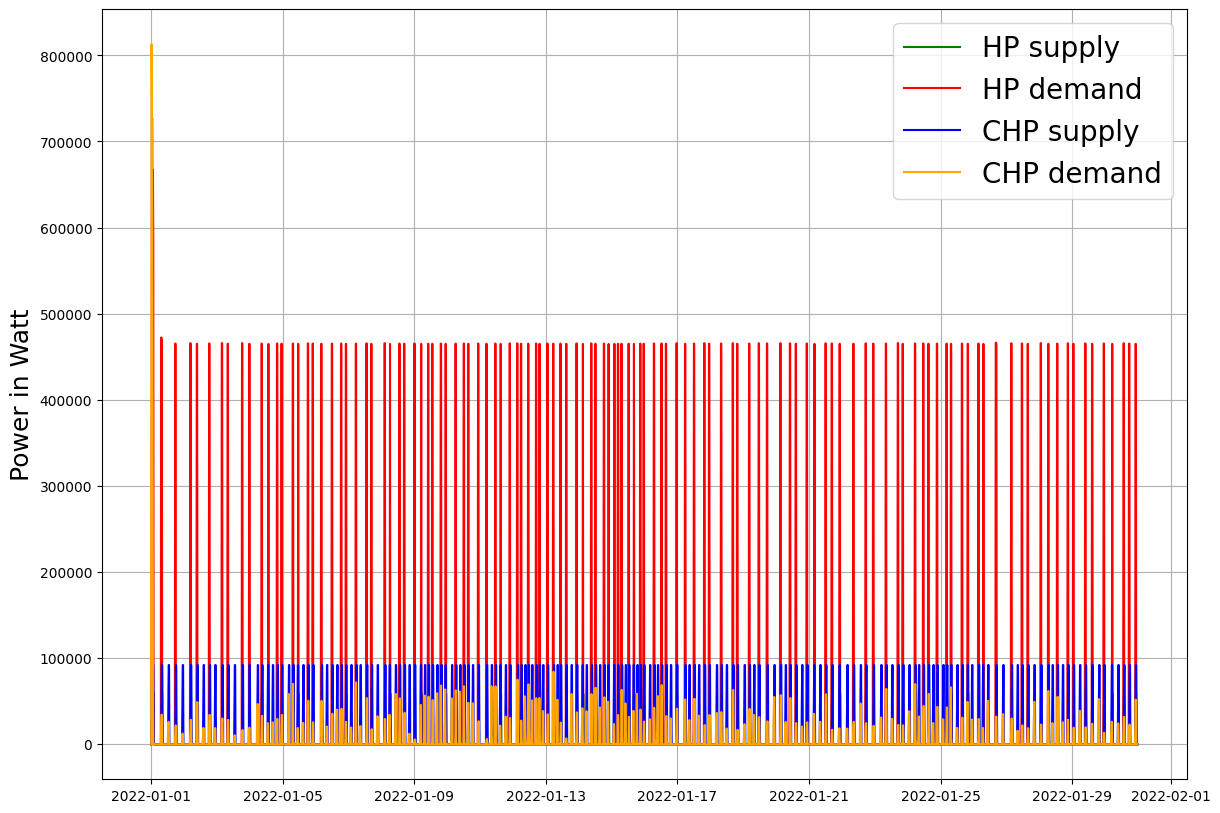

In [114]:
plt.figure(figsize=(14, 10))
# plt.plot(df['ControllerSim-0.Controller_0-heat_supply'], color='blue', label='heat supply')
plt.plot(df['ControllerSim-0.Controller_0-hp_supply'], color='green', label='HP supply')
plt.plot(df['ControllerSim-0.Controller_0-hp_demand'], color='red', label='HP demand')
plt.plot(df['ControllerSim-0.Controller_0-chp_supply'], color='blue', label='CHP supply')
plt.plot(df['ControllerSim-0.Controller_0-chp_demand'], color='orange', label='CHP demand')

# plt.plot(df['CHPSim-0.CHP_0-Q_Demand'], color='red', label='CHP demand')
# plt.yticks(fontsize=20)
plt.ylabel('Power in Watt', fontsize=18)
# plt.title('Energy flows', fontsize=30, y=1.05)
plt.grid()
plt.legend(fontsize=20)
plt.show()

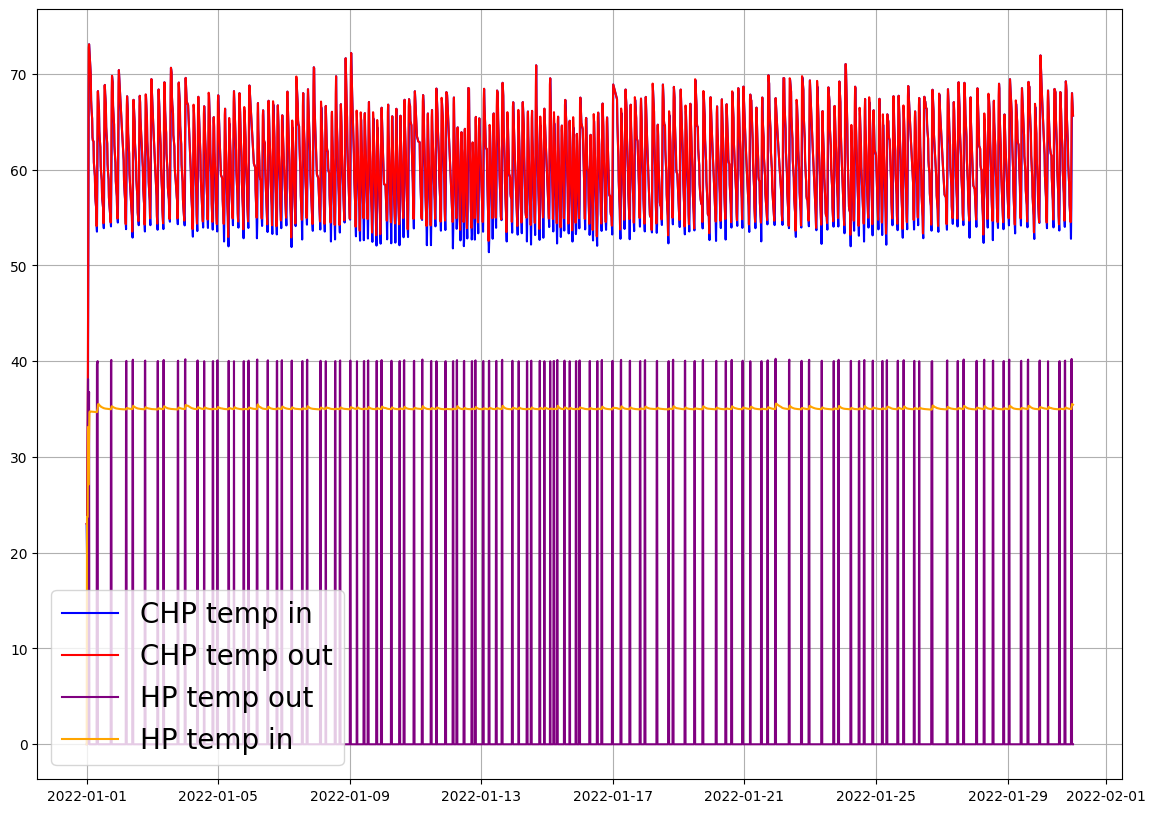

In [115]:
plt.figure(figsize=(14, 10))
plt.plot(df['CHPSim-0.CHP_0-temp_in'], color='blue', label='CHP temp in')
plt.plot(df['CHPSim-0.CHP_0-temp_out'], color='red', label='CHP temp out')
plt.plot(df['HeatPumpSim-0.HeatPump_0-cons_T'], color='purple', label='HP temp out')
plt.plot(df['HeatPumpSim-0.HeatPump_0-cond_in_T'], color='orange', label='HP temp in')

plt.grid()
plt.legend(fontsize=20)
plt.show()

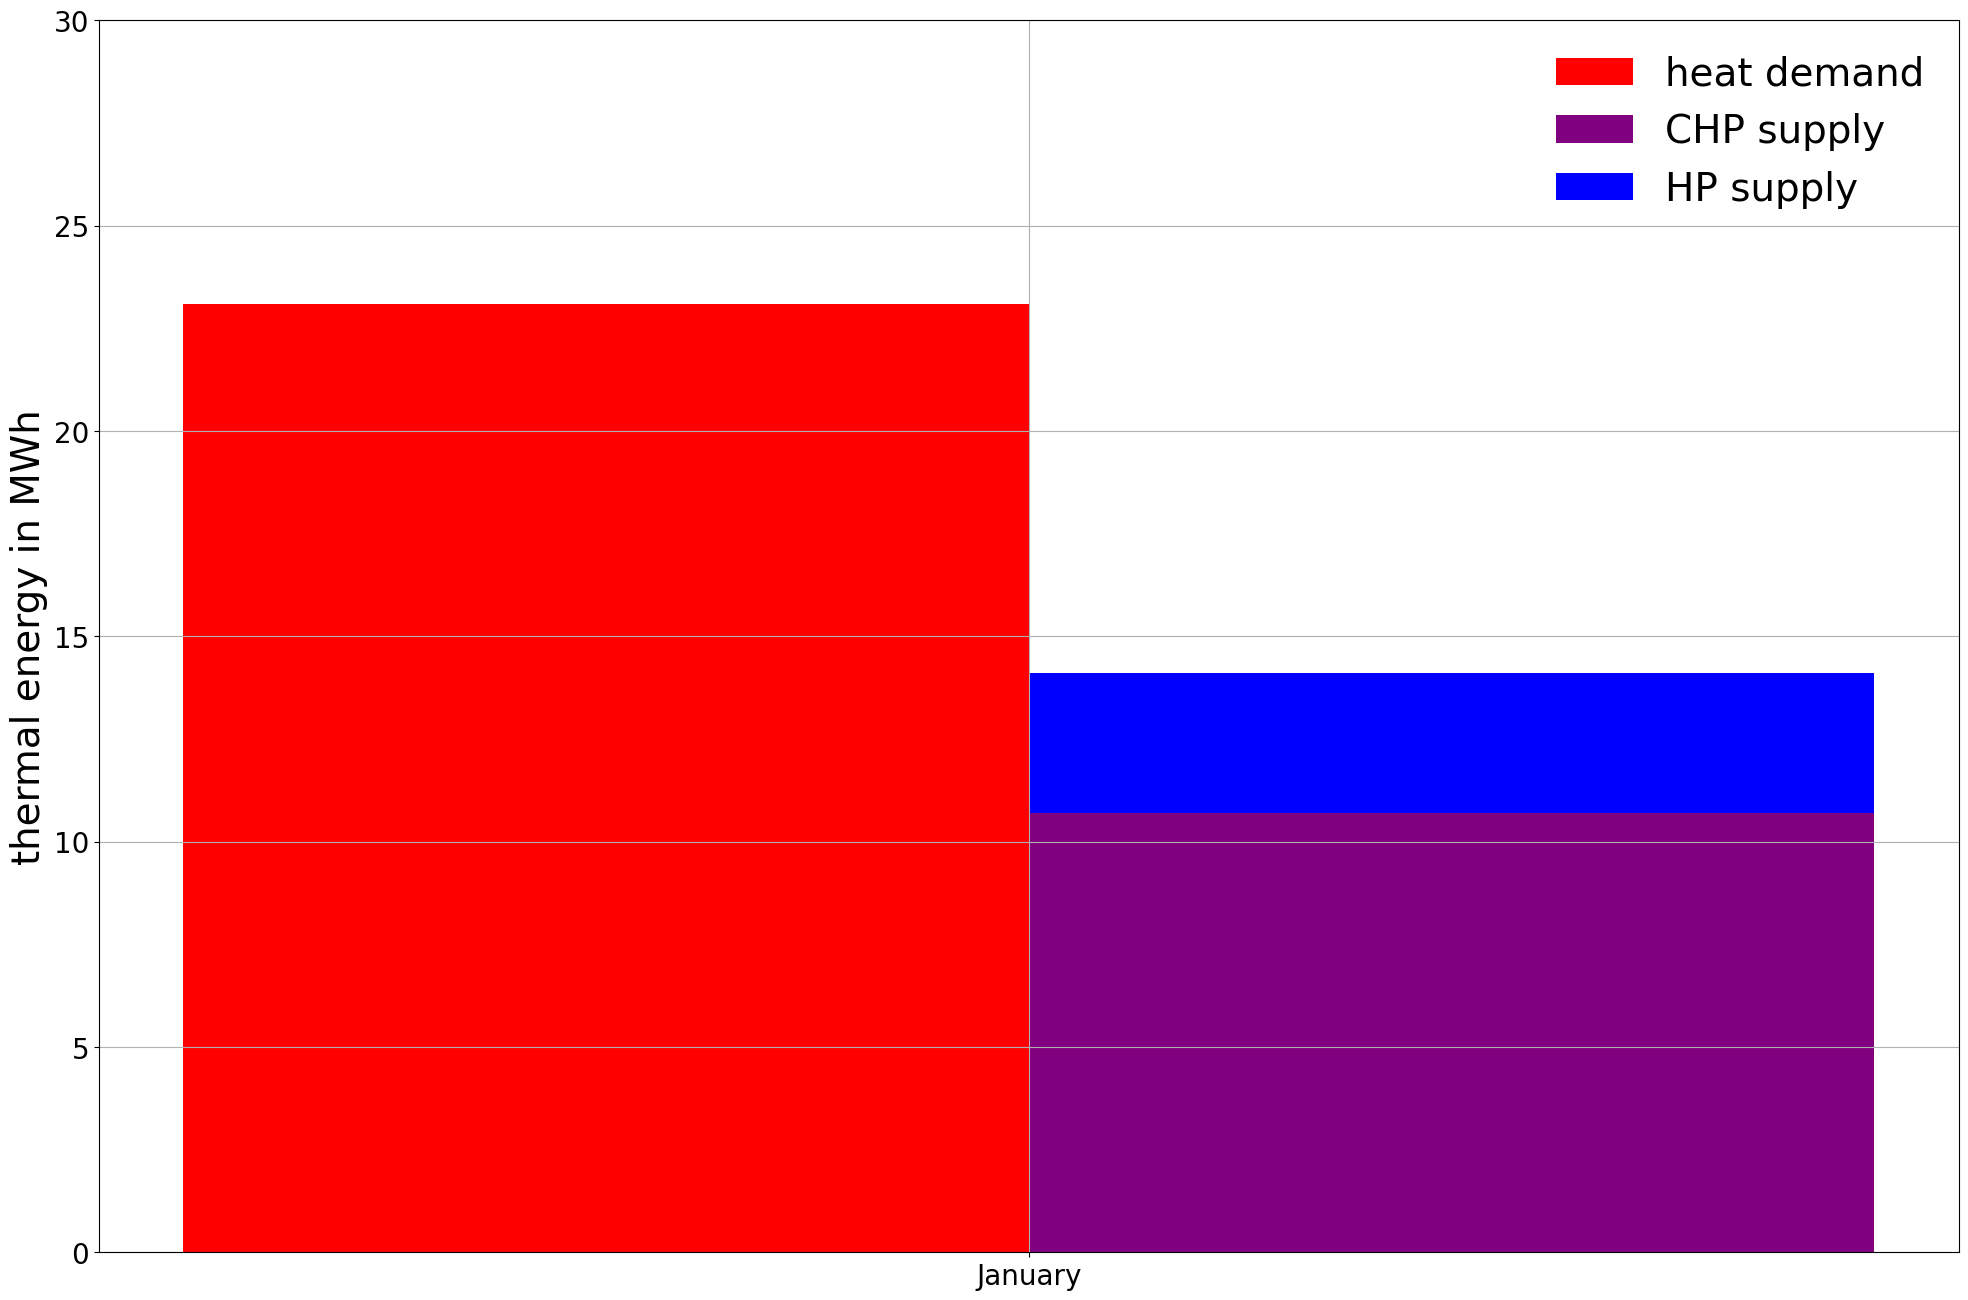

In [116]:
df_monthly = df.resample('M').sum()/4

# Generate the positions for the bars
months = df_monthly.index.month_name()
x = np.arange(len(months))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and the bar plots
plt.figure(figsize=(24, 16))

# Plot heat demand on the left
plt.bar(
    x - width/2, 
    df_monthly['ControllerSim-0.Controller_0-heat_demand']/1_000_000, 
    width=width, 
    color='red', 
    label='heat demand', 
)

# Plot CHP supply stacked with HP supply on the right
plt.bar(
    x + width/2, 
    df_monthly['ControllerSim-0.Controller_0-chp_supply']/1_000_000, 
    width=width, 
    color='purple', 
    label='CHP supply', 
)
plt.bar(
    x + width/2, 
    df_monthly['ControllerSim-0.Controller_0-hp_supply']/1_000_000, 
    width=width, 
    color='blue', 
    label='HP supply', 
    bottom=df_monthly['ControllerSim-0.Controller_0-chp_supply']/1_000_000
)

# Set x-ticks and labels
plt.xticks(x, months, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('thermal energy in MWh', fontsize=28)
plt.ylim(0,30)
plt.grid()

# Set the legend
plt.legend(fontsize=28, frameon=False)

# Display the plot
plt.show()

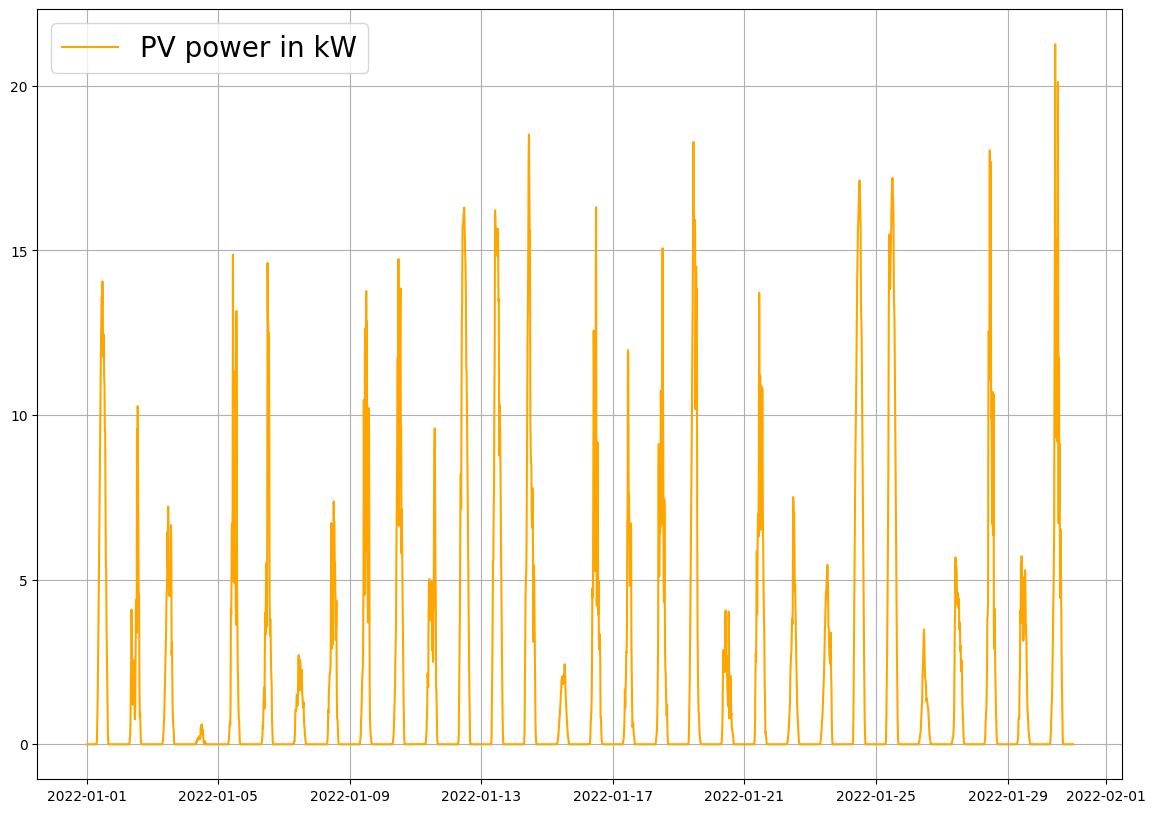

In [117]:
plt.figure(figsize=(14, 10))

plt.plot(df['PVSim-0.PV_0-P[MW]']*1000, color='orange', label='PV power in kW')
# plt.title('Energy flows', fontsize=30, y=1.05)
plt.grid()
plt.legend(fontsize=20)
plt.show()


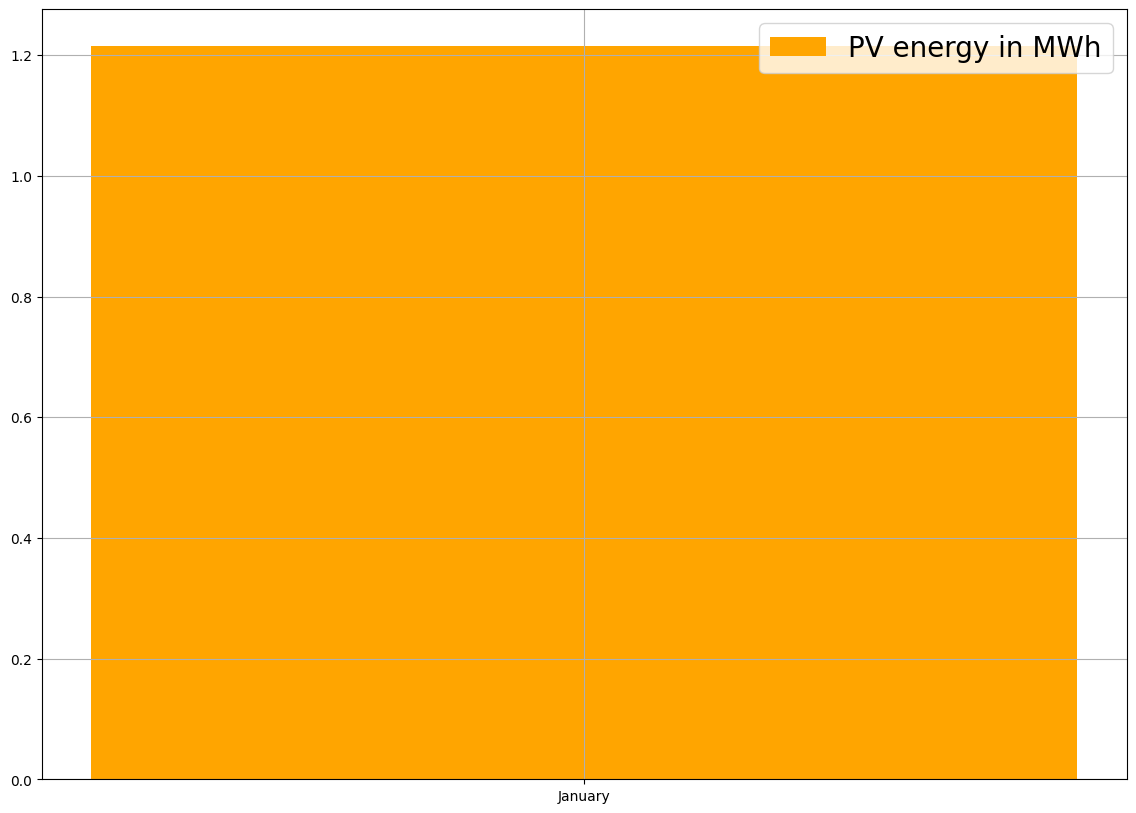

In [118]:
plt.figure(figsize=(14, 10))

plt.bar(months, df_monthly['PVSim-0.PV_0-P[MW]'], color='orange', label='PV energy in MWh')
# plt.title('Energy flows', fontsize=30, y=1.05)
plt.grid()
plt.legend(fontsize=20)
plt.show()

In [119]:
columnname = {'PVSim-0.PV_0-P[MW]': 'PV_P[MW]', 'CSV-0.DNI_0-DNI': 'DNI', 'CSV-1.HEATLOAD_0-T_amb':'T_amb', 'HeatPumpSim-0.HeatPump_0-T_amb' : 'HP_Tamb', 'CSV-1.HEATLOAD_0-Heat Demand [kW]':'Heat Demand [KW]',
       'HeatPumpSim-0.HeatPump_0-Q_Demand' : 'HP_Q_Demand', 'CHPSim-0.CHP_0-Q_Demand':'CHP_Q_Demand',
       'HeatPumpSim-0.HeatPump_0-Q_Supplied' : 'HP_Q_Supplied',
       'HeatPumpSim-0.HeatPump_0-heat_source_T' : 'HP_heat_sourceT',
       'HeatPumpSim-0.HeatPump_0-cons_T' : 'HP_consT',
       'HeatPumpSim-0.HeatPump_0-P_Required': 'HP_P_Required', 'HeatPumpSim-0.HeatPump_0-COP':'HP_COP',
       'HeatPumpSim-0.HeatPump_0-cond_m':'HP_cond_m', 'HeatPumpSim-0.HeatPump_0-cond_in_T':'HP_cond_in_T',
       'HeatPumpSim-0.HeatPump_0-on_fraction':'HP_onfraction',
       'ControllerSim-0.Controller_0-heat_demand':'heat_demand',
       'ControllerSim-0.Controller_0-heat_supply':'heat_supply',
       'ControllerSim-0.Controller_0-hp_demand':'hp_demand',
       'ControllerSim-0.Controller_0-hp_supply':'hp_supply',
       'ControllerSim-0.Controller_0-chp_demand':'chp_demand',
       'ControllerSim-0.Controller_0-chp_supply':'chp_supply',
       'ControllerSim-0.Controller_0-heat_in_F':'heatin_F',
       'ControllerSim-0.Controller_0-heat_in_T':'heatin_T',
       'ControllerSim-0.Controller_0-heat_out_F':'heatout_F',
       'ControllerSim-0.Controller_0-heat_out_T':'heatout_T',
       'ControllerSim-0.Controller_0-chp_in_F':'chpin_F',
       'ControllerSim-0.Controller_0-chp_in_T':'chpin_T',
       'ControllerSim-0.Controller_0-chp_out_F':'chpout_F',
       'ControllerSim-0.Controller_0-chp_out_T':'chpout_T',
       'ControllerSim-0.Controller_0-hp_out_F':'hpout_F',
       'ControllerSim-0.Controller_0-hp_out_T':'hpout_T',
       'ControllerSim-0.Controller_0-P_hr':'P_hr',
       'HotWaterTankSim-0.HotWaterTank_0-sensor_00.T':'HWTSim0_sensor0_T',
       'HotWaterTankSim-1.HotWaterTank_0-sensor_00.T':'HWTSim1_sensor0_T',
       'HotWaterTankSim-2.HotWaterTank_0-sensor_00.T':'HWTSim2_sensor0_T',
       'HotWaterTankSim-0.HotWaterTank_0-sensor_01.T':'HWTSim0_sensor1_T',
       'HotWaterTankSim-1.HotWaterTank_0-sensor_01.T':'HWTSim1_sensor1_T',
       'HotWaterTankSim-2.HotWaterTank_0-sensor_01.T':'HWTSim2_sensor1_T',
       'HotWaterTankSim-0.HotWaterTank_0-sensor_02.T':'HWTSim0_sensor2_T',
       'HotWaterTankSim-1.HotWaterTank_0-sensor_02.T':'HWTSim1_sensor2_T',
       'HotWaterTankSim-2.HotWaterTank_0-sensor_02.T':'HWTSim2_sensor2_T',
       'HotWaterTankSim-0.HotWaterTank_0-heat_out.T':'HWTSim0_heatout_T',
       'HotWaterTankSim-1.HotWaterTank_0-heat_out.T':'HWTSim1_heatout_T',
       'HotWaterTankSim-2.HotWaterTank_0-heat_out.T':'HWTSim2_heatout_T',
       'HotWaterTankSim-0.HotWaterTank_0-heat_out.F':'HWTSim0_heatout_F',
       'HotWaterTankSim-1.HotWaterTank_0-heat_out.F':'HWTSim1_heatout_F',
       'HotWaterTankSim-2.HotWaterTank_0-heat_out.F':'HWTSim2_heatout_F',
       'HotWaterTankSim-0.HotWaterTank_0-hp_in.T':'HWTSim0_hp_in_T',
       'HotWaterTankSim-1.HotWaterTank_0-hp_in.T':'HWTSim1_hp_in_T',
       'HotWaterTankSim-2.HotWaterTank_0-hp_in.T':'HWTSim2_hp_in_T',
       'HotWaterTankSim-0.HotWaterTank_0-hp_in.F':'HWTSim0_hp_in_F',
       'HotWaterTankSim-1.HotWaterTank_0-hp_in.F':'HWTSim1_hp_in_F',
       'HotWaterTankSim-2.HotWaterTank_0-hp_in.F':'HWTSim2_hp_in_F',
       'HotWaterTankSim-0.HotWaterTank_0-hp_out.T':'HWTSim0_hp_out_T',
       'HotWaterTankSim-1.HotWaterTank_0-hp_out.T':'HWTSim1_hp_out_T',
       'HotWaterTankSim-2.HotWaterTank_0-hp_out.T':'HWTSim2_hp_out_T',
       'HotWaterTankSim-0.HotWaterTank_0-hp_out.F':'HWTSim0_hp_out_F',
       'HotWaterTankSim-1.HotWaterTank_0-hp_out.F':'HWTSim1_hp_out_F',
       'HotWaterTankSim-2.HotWaterTank_0-hp_out.F':'HWTSim2_hp_out_F',
       'HotWaterTankSim-0.HotWaterTank_0-heat_in.T':'HWTSim0_heatin_T',
       'HotWaterTankSim-1.HotWaterTank_0-heat_in.T':'HWTSim1_heatin_T',
       'HotWaterTankSim-2.HotWaterTank_0-heat_in.T':'HWTSim2_heatin_T',
       'HotWaterTankSim-0.HotWaterTank_0-heat_in.F':'HWTSim0_heatin_F',
       'HotWaterTankSim-1.HotWaterTank_0-heat_in.F':'HWTSim1_heatin_F',
       'HotWaterTankSim-2.HotWaterTank_0-heat_in.F':'HWTSim2_heatin_F',
       'HotWaterTankSim-0.HotWaterTank_0-T_mean':'HWTSim0_Tmean',
       'HotWaterTankSim-1.HotWaterTank_0-T_mean':'HWTSim1_Tmean',
       'HotWaterTankSim-2.HotWaterTank_0-T_mean':'HWTSim2_Tmean', 'CHPSim-0.CHP_0-eff_el':'CHP_eff',
       'CHPSim-0.CHP_0-nom_P_th':'CHP_nom_Pth', 'CHPSim-0.CHP_0-mdot':'CHP_mdot',
       'CHPSim-0.CHP_0-mdot_neg':'CHP_mdot_neg', 'CHPSim-0.CHP_0-temp_in':'CHP_tempin',
       'CHPSim-0.CHP_0-temp_out':'CHP_tempout', 'CHPSim-0.CHP_0-P_th':'CHP_Pth', 'HeatPumpSim-0.HeatPump_0-Q_evap' : 'HP_Q_Evap'}

In [120]:
oldcolumns = df.columns
column_translate = np.asarray(list(columnname.keys()))

n = np.setdiff1d(oldcolumns,column_translate)  
print(f'translation not defined for :\n {n}') 

df.rename(columns = columnname, inplace = True)
# df.head()
print(f'{len(df.columns)-len(columnname.keys())} columns were not translated!')

columnnew = df.columns
targetcolumn = np.asarray(list(columnname.values()))
for i,j in zip(columnnew, targetcolumn):
    if not i == j:

        print(f'{j} not translated\n')

translation not defined for :
 ['Boilersim-0.BOILER_0-P_th' 'Boilersim-0.BOILER_0-Q_Demand'
 'Boilersim-0.BOILER_0-fuel_m3' 'Boilersim-0.BOILER_0-mdot'
 'Boilersim-0.BOILER_0-temp_out' 'CHPSim-0.CHP_0-P_el'
 'CHPSim-0.CHP_0-fuel_m3' 'ControllerSim-0.Controller_0-dt']
8 columns were not translated!
HP_Q_Supplied not translated

HP_heat_sourceT not translated

HP_consT not translated

HP_P_Required not translated

HP_COP not translated

HP_cond_m not translated

HP_cond_in_T not translated

HP_onfraction not translated

heat_demand not translated

heat_supply not translated

hp_demand not translated

hp_supply not translated

chp_demand not translated

chp_supply not translated

heatin_F not translated

heatin_T not translated

heatout_F not translated

heatout_T not translated

chpin_F not translated

chpin_T not translated

chpout_F not translated

chpout_T not translated

hpout_F not translated

hpout_T not translated

P_hr not translated

HWTSim0_sensor0_T not translated

HWTSim1_sen

In [121]:
pd.set_option('display.max_columns', None)
df.head()

,PV_P[MW],DNI,T_amb,HP_Tamb,Heat Demand [KW],HP_Q_Demand,CHP_Q_Demand,Boilersim-0.BOILER_0-Q_Demand,HP_Q_Supplied,HP_heat_sourceT,HP_consT,HP_P_Required,HP_COP,HP_cond_m,HP_cond_in_T,HP_onfraction,HP_Q_Evap,heat_demand,heat_supply,hp_demand,hp_supply,chp_demand,chp_supply,heatin_F,heatin_T,heatout_F,heatout_T,chpin_F,chpin_T,chpout_F,chpout_T,hpout_F,hpout_T,P_hr,ControllerSim-0.Controller_0-dt,HWTSim0_sensor0_T,HWTSim1_sensor0_T,HWTSim2_sensor0_T,HWTSim0_sensor1_T,HWTSim1_sensor1_T,HWTSim2_sensor1_T,HWTSim0_sensor2_T,HWTSim1_sensor2_T,HWTSim2_sensor2_T,HWTSim0_heatout_T,HWTSim1_heatout_T,HWTSim2_heatout_T,HWTSim0_heatout_F,HWTSim1_heatout_F,HWTSim2_heatout_F,HWTSim0_hp_in_T,HWTSim1_hp_in_T,HWTSim2_hp_in_T,HWTSim0_hp_in_F,HWTSim1_hp_in_F,HWTSim2_hp_in_F,HWTSim0_hp_out_T,HWTSim1_hp_out_T,HWTSim2_hp_out_T,HWTSim0_hp_out_F,HWTSim1_hp_out_F,HWTSim2_hp_out_F,HWTSim0_heatin_T,HWTSim1_heatin_T,HWTSim2_heatin_T,HWTSim0_heatin_F,HWTSim1_heatin_F,HWTSim2_heatin_F,HWTSim0_Tmean,HWTSim1_Tmean,HWTSim2_Tmean,CHP_eff,CHP_nom_Pth,CHP_mdot,Boilersim-0.BOILER_0-mdot,CHP_mdot_neg,CHP_tempin,CHP_tempout,Boilersim-0.BOILER_0-temp_out,CHP_Pth,Boilersim-0.BOILER_0-P_th,CHPSim-0.CHP_0-P_el,CHPSim-0.CHP_0-fuel_m3,Boilersim-0.BOILER_0-fuel_m3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,-0.991,6.855,0.000,11.73475,0.000000,0.000000,0.000000,0.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,11734.75,11734.75,0.000000,0.0,0.000000,0.000000,0.562252,35,-0.562252,39.988280,4.0,22.996807,-4.0,22.996807,-0.000000,0.000000,58839.169639,0,23.734826,15.322220,22.996807,33.034930,29.999045,29.996301,38.474668,39.992750,39.988280,38.474668,39.992750,39.988280,-0.562252,-0.562252,0.000000,38.474668,39.992750,39.988280,0.0,0.000000,0.0,23.734826,0.000000,22.996807,0.000000,0.562252,0.000000,35.0,15.322220,22.996807,0.562252,0.0,0.0,31.748141,28.438005,30.993796,0.54,92000.0,4.0,0.000000,-4.0,22.996807,22.996807,75.0,0.000000,0.0,0.00000,0.000000,0.000000
2022-01-01 00:15:00,0.0,-1.000,6.460,6.855,11.73475,0.000000,0.000000,0.000000,0.0,5.0,0.000000,0.000000,0.000000,0.000000,23.734826,1.0,0.000000,11734.75,11734.75,0.000000,0.0,812884.899068,48532.001333,0.942058,35,-0.942058,37.977175,4.0,22.996807,-4.0,20.316885,-0.000000,23.734826,106512.403276,0,23.736578,15.327347,20.028852,34.031540,29.996232,27.586913,35.701770,39.213237,36.967868,35.701770,39.213237,37.977175,-0.942058,-0.942058,-0.562252,35.701770,39.213237,37.977175,0.0,0.000000,0.0,23.736578,38.474668,0.000000,0.000000,0.942058,0.562252,35.0,15.327347,20.316885,0.942058,0.0,0.0,31.156629,28.178939,28.194544,0.54,92000.0,4.0,0.000000,-4.0,20.028852,22.928709,75.0,48532.001333,0.0,26207.28072,1.899225,0.000000
2022-01-01 00:30:00,0.0,-0.996,6.205,6.460,11.73475,0.000000,812884.899068,0.000000,0.0,5.0,0.000000,0.000000,0.000000,0.000000,23.736578,1.0,0.000000,11734.75,11734.75,726700.874796,0.0,742093.098872,92000.000000,0.970835,35,-0.970835,37.888929,4.0,22.996807,-4.0,22.630481,-0.000000,23.736578,110124.434604,900,23.738606,15.332471,23.074389,34.027021,29.993205,27.584803,35.329893,37.365491,38.288216,35.329893,37.365491,37.888929,-0.970835,-0.970835,-0.942058,35.329893,37.365491,37.888929,0.0,0.000000,0.0,23.738606,35.701770,39.992750,0.000000,0.970835,0.942058,35.0,15.332471,22.630481,0.970835,0.0,0.0,31.031840,27.563722,29.649136,0.54,92000.0,4.0,0.000000,-4.0,23.074389,28.571521,75.0,92000.000000,0.0,49680.00000,3.600277,0.000000
2022-01-01 00:45:00,0.0,-0.989,6.100,6.205,11.73475,726700.874796,742093.098872,742093.098872,61190.0,5.0,28.734565,15115.732299,4.048100,2.927318,23.738606,1.0,-46024.267701,11734.75,11734.75,726653.730890,61190.0,614828.021050,92000.000000,0.784892,35,-0.784892,38.573323,4.0,22.996807,-4.0,27.537100,-2.927318,23.738606,86784.884919,1800,34.386325,26.812895,28.549464,35.283622,28.789047,28.792433,35.603631,34.355660,38.696359,35.701770,35.077922,38.573323,2.142426,-0.784892,-0.970835,35.53

## Trial runs

[namespace(patch=<matplotlib.patches.PathPatch at 0x18cb2667910>,
           flows=array([13553860.   , 42829356.244]),
           angles=[0, 0],
           tips=array([[ 5686519.46351424, 21414678.122     ],
                       [17969048.26395036, -6776930.        ]]),
           text=Text(0, 0, ''),
           texts=[Text(5686519.313514243, 21414678.121999998, '1.35539E+07'),
                  Text(17969048.113950364, -6776930.0, '4.28294E+07')])]

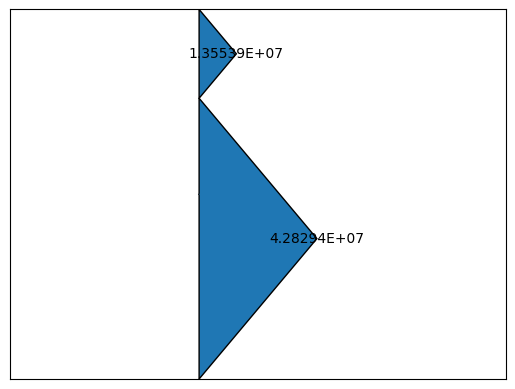

In [122]:
# Sankey.add()

Sankey(flows = [df['HP_Q_Supplied'].sum(), df['chp_supply'].sum()], orientations = [0,0]).finish()

In [123]:
a = 10
b = 15


In [124]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Heat Pump", "CHP", "Heat Load"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 2],
      value = [df['HP_Q_Supplied'].sum(), df['chp_supply'].sum()]
  ))])

fig.show()

In [125]:
# pip install nbformat

rt = 20
cp = 4186
Qflows = ['Q.hp_hwt1', 'Q.hwt0_hwt1', 'Q.hwt1_hwt2', 'Q.hwt2_sh', 'Q.sh_hwt0', 'Q.hwt0_hp', 'Q.chp_hwt2', 'Q.hwt2_chp']
massflows = ['HP_cond_m', 'HWTSim0_heatout_F', 'HWTSim1_heatout_F','HWTSim2_heatout_F','HWTSim0_heatin_F','HWTSim0_hp_out_F', 'CHP_mdot', 'CHP_mdot']
tempflows = ['HP_consT', 'HWTSim0_heatout_T','HWTSim1_heatout_T','HWTSim2_heatout_T','HWTSim0_heatin_T','HWTSim0_hp_out_T', 'CHP_tempout', 'CHP_tempin']
for x,y,z in zip(Qflows,massflows, tempflows):
    df[x] = df[y] * (df[z]-rt) * cp

## Sankey plots


### Additional columns

In [126]:
# mass flow out of tanks is -ve; so reorienting all attributes to tank attributes for a common direction notion.
# ideally: all flow in planned direction will be +ve, and reverse flow will be -ve(specially between tanks) 
#Q.hwt2_sh and 'Q.hwt0_hp' will return negative value, so just switched their directions around in the linkdict

rt = 20
cp = 4200  #since this was the cp in hplib
Qflows = ['Q.hp_hwt1', 'Q.hwt0_hwt1', 'Q.hwt1_hwt2', 'Q.hwt2_sh', 'Q.sh_hwt0', 'Q.hwt0_hp', 'Q.chp_hwt2', 'Q.hwt2_chp']
massflows = ['HWTSim1_hp_in_F', 'HWTSim1_hp_out_F', 'HWTSim2_hp_out_F','HWTSim2_heatout_F','HWTSim0_heatin_F','HWTSim0_hp_out_F', 'CHP_mdot', 'CHP_mdot']
tempflows = ['HWTSim1_hp_in_T', 'HWTSim1_hp_out_T','HWTSim2_hp_out_T','HWTSim2_heatout_T','HWTSim0_heatin_T','HWTSim0_hp_out_T', 'CHP_tempout', 'CHP_tempin']
for x,y,z in zip(Qflows,massflows, tempflows):
    df[x] = df[y] * (df[z]-rt) * cp


### Plot with more details

In [127]:
#Plot where out/fro CHP considered

fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    valuesuffix = "Wh",
    node = dict(
      pad = 10,
    #   thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Heat Pump", "Tank0", "Tank1", "Tank2", "Heat Load", "CHP"],
      x = [0, 0.35, 0.5, 0.65, 1,0.65],
      y = [0,0.2,0.85,0.35,-0.2, 0.8],
    #   color = "blue"
      color = ['Red', 'Orange', 'Orange', 'Orange', 'Green', 'Brown']
    ),
    link = dict(
      arrowlen = 55,
      source = [0, 1, 2,3, 4, 1,5,3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 2, 3,4, 1, 0,3,5],
      value = [(((df[x].sum())**2)**0.5)/4 for x in Qflows]
    #   curve = [0, 0, 0, 0.5, 0]
  ))])

fig.show()

In [128]:
#calculating values for the sankey plot

vals = [np.abs((df[x].sum())/4) for x in Qflows[0:6]]
vals.append(df['chp_supply'].sum()/4)

checkvals = [((df[x].sum())/4) for x in Qflows[0:6]] #just to check which are -ve
vals.append(df['chp_supply'].sum()/4)

vals2 = checkvals = [((df[x].sum())/4) for x in Qflows]

In [129]:
#To reverse source and target if negative value 

sources = []
targets = []


linkdict = [(0, 2), (1, 2), (2, 3), (4, 3), (4, 1), (0, 1)]
for i,x in enumerate(Qflows[0:6]):
    if df[x].sum() < 0:
        a = linkdict[i][1]
        b = linkdict[i][0]
    else:
        a = linkdict[i][0]
        b = linkdict[i][1]
    sources.append(a)
    targets.append(b)
sources.append(5)
targets.append(3)

In [130]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    valuesuffix = "Wh",
    node = dict(
      pad = 10,
    #   thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Heat Pump", "Tank0", "Tank1", "Tank2", "Heat Load", "CHP"],
      x = [0, 0.35, 0.5, 0.65, 1,0.55],
      y = [0,-0.5,0.0,0.35,-0.2, -0.4],
    #   color = "blue"
      color = ['Red', 'Orange', 'Orange', 'Orange', 'Green', 'Brown']
    ),
    link = dict(
      arrowlen = 55,
      # source = [0, 1, 2,3, 4, 1,5], # indices correspond to labels, eg A1, A2, A1, B1, ...
      # target = [2, 2, 3,4, 1, 0,3],
      source = sources,
      target = targets,
      value = vals
    #   curve = [0, 0, 0, 0.5, 0]
  ))],
  layout = dict()
  )

fig.show()

### Simplified sankey

In [131]:
Qvals = ['HP_P_Required','Q.hp_hwt1', 'Q.hwt2_sh', 'Q.sh_hwt0','Q.hwt0_hp', 'chp_supply', 'CHPSim-0.CHP_0-P_el']
vals_smpl = [np.abs((df[x].sum())/4) for x in Qvals]

vals_smpl_check = [((df[x].sum())/4) for x in Qvals]

In [132]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    valuesuffix = "Wh",
    node = dict(
      pad = 10,
    #   thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Grid',"Heat Pump", "HST", "Heat Load", "CHP"],
      # x = [0, 0.35, 0.5, 0.65, 1,0.55],
      # y = [0,-0.5,0.0,0.35,-0.2, -0.4],
    #   color = "blue"
      color = ['Yellow', 'Red', 'Orange', 'Green', 'Brown']
    ),
    link = dict(
      arrowlen = 55,
      source = [0, 1, 2,3, 2, 4, 4], # actually not, no dynamic switching here!
      target = [1, 2, 3,2, 1, 2, 0],
      # source = sources,
      # target = targets,
      value = vals_smpl
    #   curve = [0, 0, 0, 0.5, 0]
  ))],
  layout = dict()
  )

fig.show()

In [133]:
df['HP_Q_Supplied'].sum()/(4*1000000)

3.388465

In [134]:
629-548 + 67.2

148.2

In [135]:
df['heat_demand'].sum()/(4*1000000)

23.086696

### oversimplified sankey

In [136]:
step_size = 15 * 60

In [137]:
Qvals_osimpl = ['HP_P_Required','HP_Q_Supplied', 'Q.hwt2_sh', 'chp_supply', 'CHPSim-0.CHP_0-P_el']
vals_smpl2 = [np.abs((df[x].sum()) * step_size/3600) for x in Qvals_osimpl]
vals_smpl2.append(vals_smpl2[4]-vals_smpl2[0])
vals_smpl2.append(vals_smpl2[1]+vals_smpl2[3] + df['Boilersim-0.BOILER_0-P_th'].sum() * step_size/3600 - vals_smpl2[2]) #appending electricity generation and the losses after heat pump/hst
vals_smpl2.append(np.abs(df['HP_Q_Evap'].sum() * step_size/3600))
vals_smpl2.append(df['Boilersim-0.BOILER_0-P_th'].sum() * step_size/3600)

In [138]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    valuesuffix = "Wh",
    node = dict(
      pad = 10,
    #   thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Grid',"Heat Pump", "HST", "Heat Load", "CHP", "Electricity Gen.", "energy loss", "Environment", "Gas Boiler"],
      x = [0.35, 0.0, 0.7, 0.85, 0.25, 0.95, 0.2, 0.45, 0.25],
      y = [0.5,0,0.3,0,-0.5,0.9,1.15,-2, 0],
    #   color = "blue"
      color = ['Yellow', 'rgba(5, 0, 189, 0.8)', 'rgba(0, 0, 189, 0.8)', 'Green', 'Brown', 'rgba(0, 168, 0, 0.5)', 'rgba(150, 200, 0, 0.8)', 'rgba(0, 200, 150, 0.8)', 'red']
    ),
    link = dict(
      # arrowlen = 85,
      source = [0, 1, 2, 4, 4,0, 2, 7, 8], # actually not, no dynamic switching here!reversed directions for hwt2_sh and hwt0_hp
      target = [1, 2, 3, 2, 0, 5, 6, 1, 2],
      # source = sources,
      # target = targets,
      value = vals_smpl2,
      color = ['rgba(0, 168, 0, 0.5)', 'rgba(0, 0, 189, 0.5)', 'rgba(0, 0, 189, 0.5)', 'rgba(137, 0, 189, 0.5)', 'rgba(0, 168, 0, 0.5)', 'rgba(0, 168, 0, 0.5)', 'rgba(143, 0, 43, 0.9)','rgba(0, 200, 150, 0.5)', 'rgba(130, 0, 3, 0.76)']
    #   curve = [0, 0, 0, 0.5, 0]
  ))],
  layout = dict()
  )

fig.show()

In [167]:
posn = {
    'Grid': (0.35, 0.65, 'Yellow', 'rgba(0, 168, 0, 0.5)'), #(x,y, pad colour, arrow colour) #arrow colour not very accurate here, should actually be paried with source and target .
    'Heat Pump': (0.0, 2, 'rgba(217, 104, 0, 1)', 'rgba(217, 104, 0, 0.76)'),
    'HST': (0.7, 0.3, 'rgba(0, 0, 189, 0.8)', 'rgba(0, 0, 189, 0.5)'),
    'Heat Load': (0.85, 0.0, 'Green', 'rgba(137, 0, 189, 0.5)'),
    'CHP': (0.25, -0.5, 'Brown', 'rgba(0, 168, 0, 0.5)'),
    'Electricity Gen.': (0.95, 0.9, 'rgba(0, 168, 0, 0.5)', 'rgba(0, 168, 0, 0.5)'),
    'energy loss': (0.85, -1.7, 'rgba(69, 0, 0, 0.76)', 'rgba(143, 0, 43, 0.9)'),
    'Environment': (0, 2, 'rgba(0, 200, 150, 0.8)', 'rgba(0, 200, 150, 0.5)'),
    'Gas Boiler': (0.25, -2, 'red', 'rgba(130, 0, 3, 0.56)')
}



In [168]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    valuesuffix = "Wh",
    node = dict(
      pad = 10,
    #   thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(posn.keys()),
      x = [val[0] for val in posn.values()],
      y = [val[1] for val in posn.values()],
    #   color = "blue"
      color = [val[2] for val in posn.values()]
    ),
    link = dict(
      arrowlen = 15,
      source = [0, 1, 2, 4, 4,0, 2, 7, 8], # actually not, no dynamic switching here!reversed directions for hwt2_sh and hwt0_hp
      target = [1, 2, 3, 2, 0, 5, 6, 1, 2],
      # source = sources,
      # target = targets,
      value = vals_smpl2,
      color = [val[3] for val in posn.values()]
    #   curve = [0, 0, 0, 0.5, 0]
  ))],
  layout = dict()
  )

fig.show()

In [141]:
# fig = go.Figure(data=[go.Sankey(
#     arrangement = "snap",
#     valuesuffix = "Wh",
#     node = dict(
#       pad = 10,
#     #   thickness = 20,
#       line = dict(color = "black", width = 0.5),
#       label = ["Heat Pump", "Tank0", "Tank1", "Tank2", "Heat Load", 'Q.chp_hwt2', 'Q.hwt2_chp'],
#       x = [0, 0.35, 0.5, 0.65, 1],
#       y = [0,0.2,0.85,0.35,-0.2],
#     #   color = "blue"
#       color = ['Red', 'Orange', 'Orange', 'Orange', 'Green']
#     ),
#     link = dict(
#       arrowlen = 55,
#       source = [0, 1, 2,3, 4, 1], # indices correspond to labels, eg A1, A2, A1, B1, ...
#       target = [2, 2, 3,4, 1, 0],
#       value = [((df[x].sum())**2)**0.5 for x in Qflows]
#     #   curve = [0, 0, 0, 0.5, 0]
#   ))])

# fig.show()

In [142]:
df['HP_Q_Evap'].sum()/4

-2385663.4467930244

In [143]:
df.loc['2022-01-01 00:00:00':'2022-01-01 00:04:00','CHP_Pth']

date
2022-01-01    0.0
Name: CHP_Pth, dtype: float64

(array([18993.        , 18993.04166667, 18993.08333333, 18993.125     ,
        18993.16666667, 18993.20833333]),
 [Text(18993.0, 0, '01-01 00'),
  Text(18993.041666666668, 0, '01-01 01'),
  Text(18993.083333333332, 0, '01-01 02'),
  Text(18993.125, 0, '01-01 03'),
  Text(18993.166666666668, 0, '01-01 04'),
  Text(18993.208333333332, 0, '01-01 05')])

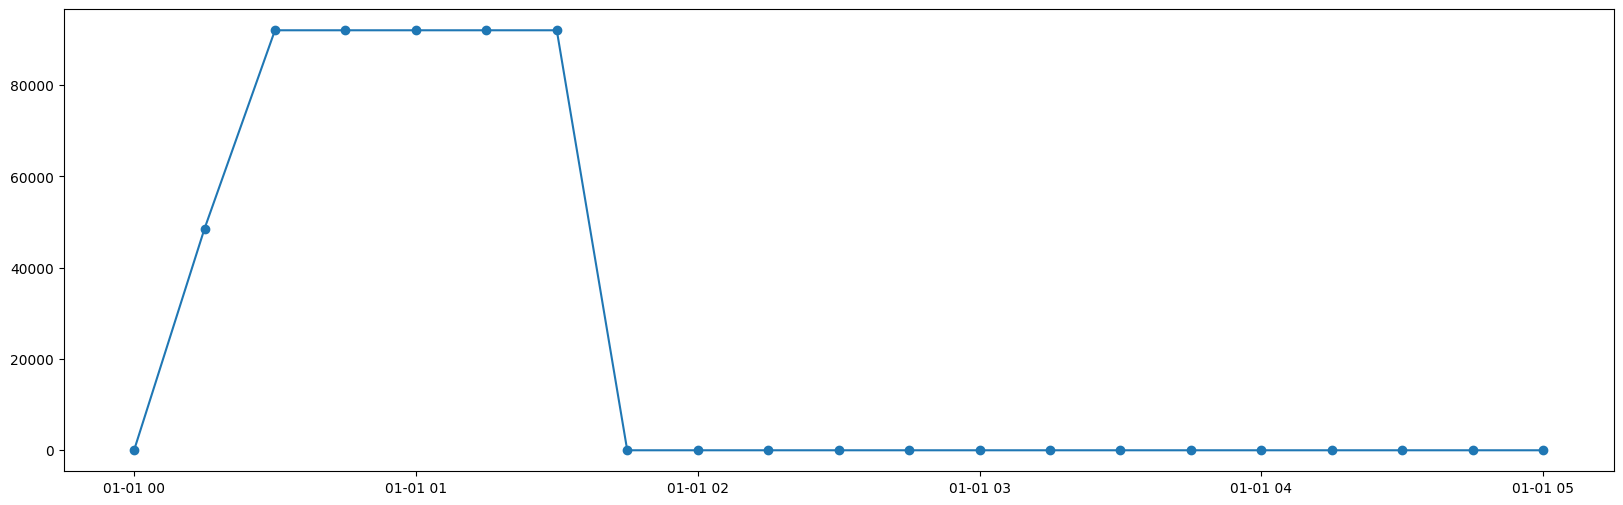

In [144]:
plt.figure(figsize = [20,6])
plt.plot(df.loc['2022-01-01 00:00:00':'2022-01-01 05:00:00','CHP_Pth'], marker = 'o')
plt.xticks()

In [145]:
#The small kinks at the top occur when switching to P_nom after the 11th minute, measerd data and the chp reg model goes upto 100Kw.

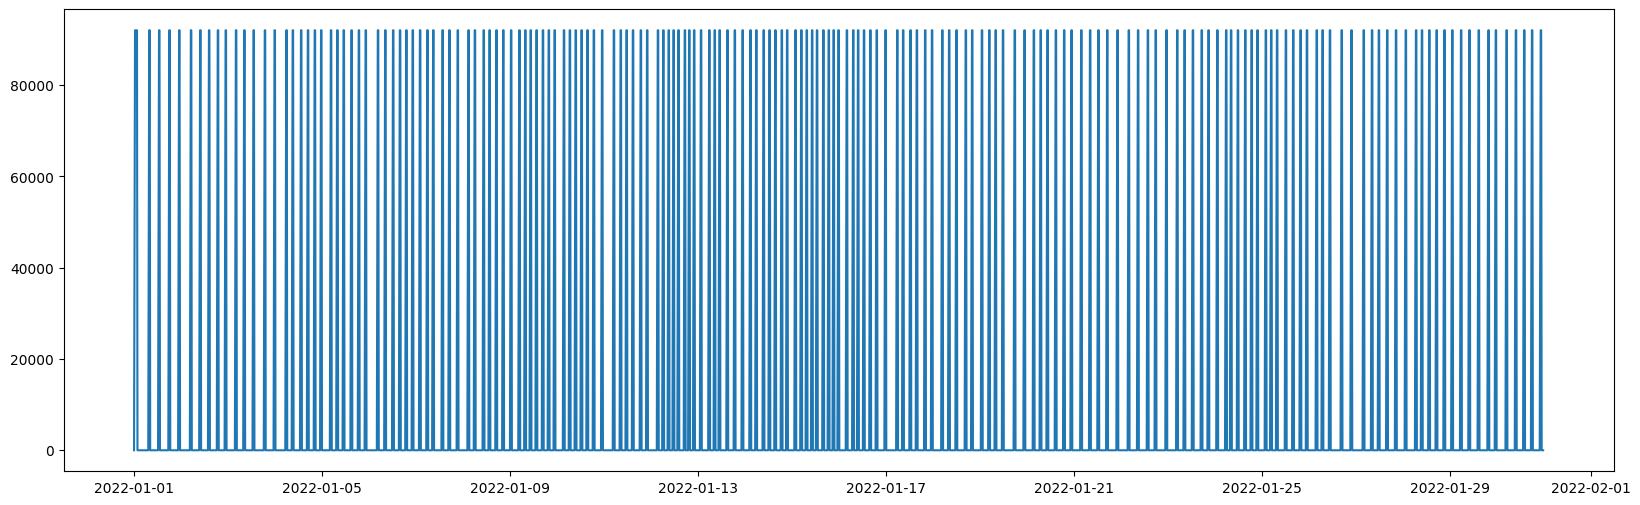

In [146]:
plt.figure(figsize = [20,6])
plt.plot(df.loc[:,'CHP_Pth'])

In [147]:
print(f"Total fuel consumption = {df['CHPSim-0.CHP_0-fuel_m3'].sum():.1f}")

Total fuel consumption = 1676.1


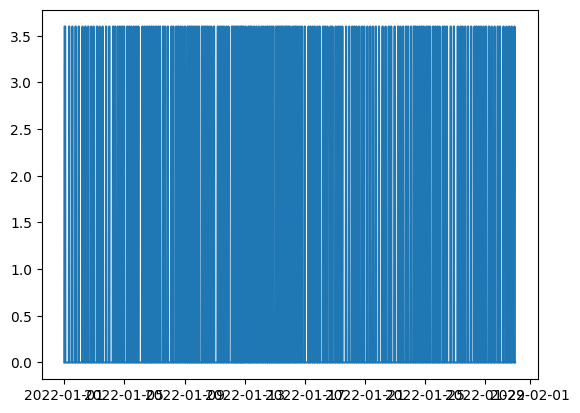

In [148]:

plt.plot(df['CHPSim-0.CHP_0-fuel_m3'])

In [149]:
mask = [col for col in df.columns if col.startswith('Boiler')]
mask

['Boilersim-0.BOILER_0-Q_Demand',
 'Boilersim-0.BOILER_0-mdot',
 'Boilersim-0.BOILER_0-temp_out',
 'Boilersim-0.BOILER_0-P_th',
 'Boilersim-0.BOILER_0-fuel_m3']

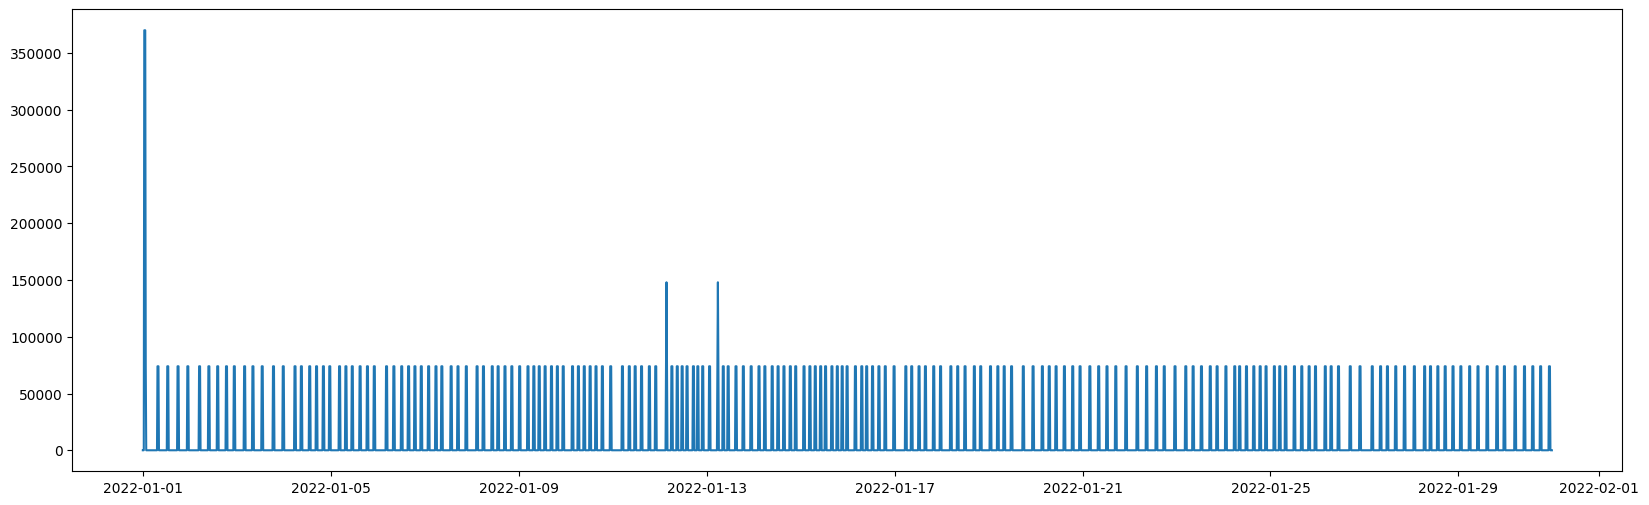

In [150]:
plt.figure(figsize = [20,6])
plt.plot(df['Boilersim-0.BOILER_0-P_th'])

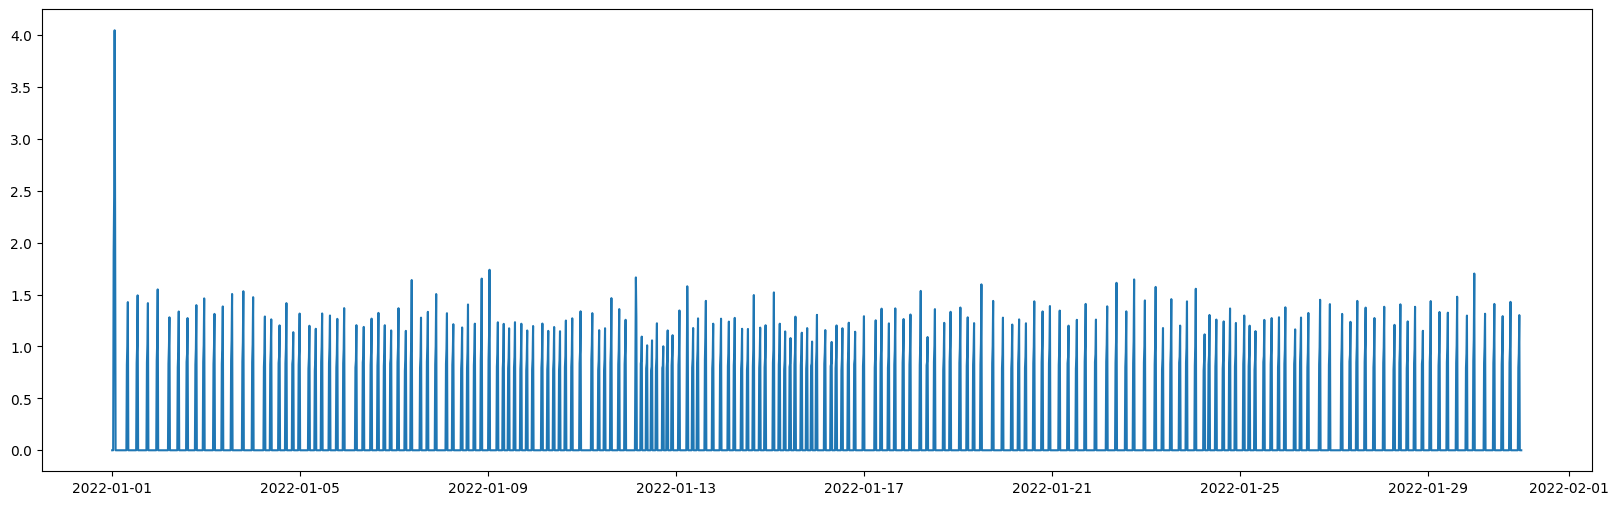

In [151]:
plt.figure(figsize = [20,6])
plt.plot(df['Boilersim-0.BOILER_0-mdot'])

In [152]:
conv = 15/(60e6) #In Gwh
df['Boilersim-0.BOILER_0-P_th'].sum() * conv, df['chp_supply'].sum() * conv

(10.434, 10.707339060999999)

In [153]:
df['ControllerSim-0.Controller_0-dt']

date
2022-01-01 00:00:00       0
2022-01-01 00:15:00       0
2022-01-01 00:30:00     900
2022-01-01 00:45:00    1800
2022-01-01 01:00:00    2700
                       ... 
2022-01-30 22:45:00       0
2022-01-30 23:00:00       0
2022-01-30 23:15:00       0
2022-01-30 23:30:00       0
2022-01-30 23:45:00       0
Name: ControllerSim-0.Controller_0-dt, Length: 2880, dtype: int64

In [154]:
df['tmp_diff'] = 55 - df['HWTSim2_sensor2_T']

In [155]:


fig = go.Figure()

# First plot (Controller Simulation)
fig.add_trace(go.Scatter(
    y=df['ControllerSim-0.Controller_0-dt'],
    mode='lines',
    name='Controller_0-dt',
    line=dict(color='blue')
))

# Second plot (Boiler Simulation)
fig.add_trace(go.Scatter(
    y=df['Boilersim-0.BOILER_0-P_th'],
    mode='lines',
    name='BOILER_0-P_th',
    line=dict(color='red'),
    yaxis='y2'  # Associate it with a second subplot
))

# Update layout to create subplots
fig.update_layout(
    height=600,  # Total height of the figure
    title_text='Vertically Stacked Interactive Subplots',
    showlegend=True,
    xaxis=dict(title='Time'),
    yaxis=dict(title='Controller Simulation'),
    yaxis2=dict(
        title='Boiler Simulation',
        overlaying='y',  # Overlay y-axis for second subplot
        side='right',
        anchor='free',
        position=1
    )
)

fig.show()


In [156]:
df.columns

Index(['PV_P[MW]', 'DNI', 'T_amb', 'HP_Tamb', 'Heat Demand [KW]',
       'HP_Q_Demand', 'CHP_Q_Demand', 'Boilersim-0.BOILER_0-Q_Demand',
       'HP_Q_Supplied', 'HP_heat_sourceT', 'HP_consT', 'HP_P_Required',
       'HP_COP', 'HP_cond_m', 'HP_cond_in_T', 'HP_onfraction', 'HP_Q_Evap',
       'heat_demand', 'heat_supply', 'hp_demand', 'hp_supply', 'chp_demand',
       'chp_supply', 'heatin_F', 'heatin_T', 'heatout_F', 'heatout_T',
       'chpin_F', 'chpin_T', 'chpout_F', 'chpout_T', 'hpout_F', 'hpout_T',
       'P_hr', 'ControllerSim-0.Controller_0-dt', 'HWTSim0_sensor0_T',
       'HWTSim1_sensor0_T', 'HWTSim2_sensor0_T', 'HWTSim0_sensor1_T',
       'HWTSim1_sensor1_T', 'HWTSim2_sensor1_T', 'HWTSim0_sensor2_T',
       'HWTSim1_sensor2_T', 'HWTSim2_sensor2_T', 'HWTSim0_heatout_T',
       'HWTSim1_heatout_T', 'HWTSim2_heatout_T', 'HWTSim0_heatout_F',
       'HWTSim1_heatout_F', 'HWTSim2_heatout_F', 'HWTSim0_hp_in_T',
       'HWTSim1_hp_in_T', 'HWTSim2_hp_in_T', 'HWTSim0_hp_in_F',
       'H

In [157]:
mask = ['Heat Demand [KW]',
       'HP_Q_Demand', 'CHP_Q_Demand', 'Boilersim-0.BOILER_0-Q_Demand',
       'HP_Q_Supplied', 'HP_heat_sourceT','HP_P_Required',
       'HP_COP', 'HP_cond_m', 'HP_cond_in_T', 'HP_onfraction', 'HP_Q_Evap',
       'chp_supply', 'heatin_F', 'heatin_T', 'heatout_F', 'heatout_T',
       'chpin_F', 'chpin_T', 'chpout_F', 'chpout_T', 'hpout_F', 'hpout_T',
       'P_hr', 'HWTSim0_sensor0_T', 'HWTSim1_sensor0_T', 'HWTSim2_sensor0_T',
       'HWTSim0_sensor1_T', 'HWTSim1_sensor1_T', 'HWTSim2_sensor1_T',
       'HWTSim0_sensor2_T', 'HWTSim1_sensor2_T', 'HWTSim2_sensor2_T',
       'HWTSim0_heatout_T', 'HWTSim1_heatout_T', 'HWTSim2_heatout_T',
       'HWTSim0_heatout_F', 'HWTSim1_heatout_F', 'HWTSim2_heatout_F',
       'HWTSim0_hp_in_T', 'HWTSim1_hp_in_T', 'HWTSim2_hp_in_T',
       'HWTSim0_hp_in_F', 'HWTSim1_hp_in_F', 'HWTSim2_hp_in_F',
       'HWTSim0_hp_out_T', 'HWTSim1_hp_out_T', 'HWTSim2_hp_out_T',
       'HWTSim0_hp_out_F', 'HWTSim1_hp_out_F', 'HWTSim2_hp_out_F',
       'HWTSim0_heatin_T', 'HWTSim1_heatin_T', 'HWTSim2_heatin_T',
       'HWTSim0_heatin_F', 'HWTSim1_heatin_F', 'HWTSim2_heatin_F',
       'HWTSim0_Tmean', 'HWTSim1_Tmean', 'HWTSim2_Tmean',
        'Boilersim-0.BOILER_0-mdot',
       'CHP_tempin', 'CHP_tempout', 'Boilersim-0.BOILER_0-temp_out', 'CHP_Pth',
       'Boilersim-0.BOILER_0-P_th',
       'CHPSim-0.CHP_0-fuel_m3', 'Boilersim-0.BOILER_0-fuel_m3', 'Q.hp_hwt1',
       'Q.hwt0_hwt1', 'Q.hwt1_hwt2', 'Q.hwt2_sh', 'Q.sh_hwt0', 'Q.hwt0_hp',
       'Q.chp_hwt2', 'Q.hwt2_chp']

In [158]:
df_filtered = df[mask]
df_old = df

In [159]:
# df.to_csv('boiler_new connection.csv')

In [170]:


fig = go.Figure()

# First plot (Controller Simulation)
fig.add_trace(go.Scatter(
    y=df['hp_supply'],
    x = df.index,
    mode='lines',
    name='Heat pump',
    line=dict(color='blue')
))

# Second plot (Boiler Simulation)
fig.add_trace(go.Scatter(
    y=df['chp_supply'],
    x = df.index,
    mode='lines',
    name='CHP-P_th',
    line=dict(color='red'),
    # yaxis='y2'  # Associate it with a second subplot
))

fig.add_trace(go.Scatter(
    y=df['Boilersim-0.BOILER_0-P_th'],
    x = df.index,
    mode='lines',
    name='Boiler',
    line=dict(color='green'),
    # yaxis='y2'  # Associate it with a second subplot
))

fig.add_trace(go.Scatter(
    y=df['P_hr'],
    x = df.index,
    mode='lines',
    name='Heating rods',
    line=dict(color='yellow'),
    # yaxis='y2'  # Associate it with a second subplot
))
# Update layout to create subplots
fig.update_layout(
    height=600,  # Total height of the figure
    showlegend=True,
    xaxis=dict(title='Time'),
    yaxis=dict(title='Power in W'),
    # yaxis2=dict(
    #     title='Boiler Simulation',
    #     overlaying='y',  # Overlay y-axis for second subplot
    #     side='right',
    #     anchor='free',
    #     position=1
    # )
)

fig.show()
